### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url1=r"C:\Users\rzepeda\Dropbox\Documentos\Estudios\OracleOneAlura\Python\Challenge1\tienda_1.csv"
url2=r"C:\Users\rzepeda\Dropbox\Documentos\Estudios\OracleOneAlura\Python\Challenge1\tienda_2.csv"
url3=r"C:\Users\rzepeda\Dropbox\Documentos\Estudios\OracleOneAlura\Python\Challenge1\tienda_3.csv"
url4=r"C:\Users\rzepeda\Dropbox\Documentos\Estudios\OracleOneAlura\Python\Challenge1\tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.sample(6)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
2150,Dinosaurio Rex,Juguetes,21100.0,0.0,09/06/2022,Rafael Acosta,Pereira,5,Nequi,1,4.81333,-75.69611
1117,Guitarra acústica,Instrumentos musicales,441300.0,23700.0,05/05/2020,Lucas Olivera,Bogotá,3,Tarjeta de crédito,1,4.60971,-74.08175
686,Bicicleta,Deportes y diversión,437500.0,23500.0,11/09/2022,Pedro Gomez,Medellín,4,Tarjeta de crédito,3,6.25184,-75.56359
1884,Armario,Muebles,463300.0,22900.0,13/12/2021,Santiago Silva,Santa Marta,5,Tarjeta de crédito,3,11.24079,-74.19904
934,Balón de baloncesto,Deportes y diversión,57500.0,3300.0,21/02/2021,Beatriz Morales,Bucaramanga,5,Tarjeta de crédito,10,7.12539,-73.11980
315,Juego de mesa,Juguetes,135300.0,7600.0,11/07/2022,Juliana Costa,Medellín,5,Tarjeta de crédito,5,6.25184,-75.56359


#1. Análisis de facturación



              Ingresos
Tienda 1 1,150,880,400
Tienda 2 1,116,343,500
Tienda 3 1,098,019,600
Tienda 4 1,038,375,700


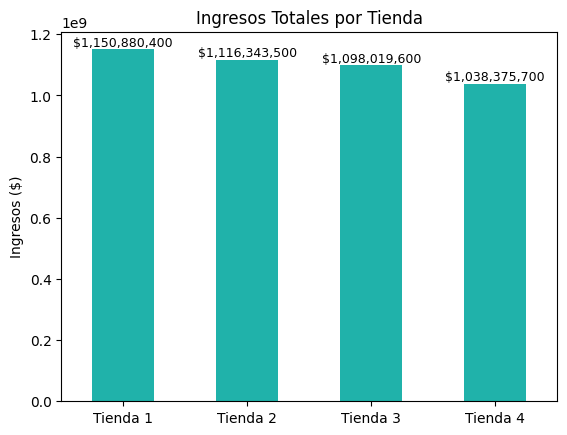

In [11]:
#Calculas los ingresos totales de cada tienda

#for x in range(1,5):
#    print("-----------------------------------------------------------------------------")
#    ingresos = eval(f'tienda{x}["Precio"].sum()')
#    print(f"Ingresos totales de la tienda {x}: ${eval(f'ingresos{x}')}")

# Agrupamos los DataFrames en un diccionario
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Calculamos ingresos totales
ingresos_totales = {nombre: df["Precio"].sum() for nombre, df in tiendas.items()}
df_ingresos = pd.DataFrame.from_dict(ingresos_totales, orient='index', columns=['Ingresos'])
pd.options.display.float_format = '{:,.0f}'.format
print(df_ingresos)

# Gráfico de barras para ingresos totales por tienda
ax = df_ingresos.plot(kind='bar', color='lightseagreen', legend=False)
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=0)

# Mostrar etiquetas numéricas encima de cada barra
for i, v in enumerate(df_ingresos["Ingresos"]):
    ax.text(i, v, f"${v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.show()

# 2. Ventas por categoría

In [21]:
#Calcular cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.
print("-----------------------------------------------------------------------------")
categorias1 = tienda1.groupby("Categoría del Producto")['Producto'].count()
#print("Cantidad de productos vendidos por categoría en la tienda 1:")
#print(categorias1)

for x in range(1,5):
    categorias = eval(f'tienda{x}.groupby("Categoría del Producto")["Producto"].count()')
    print(f"El top 5 de ventas por categoría en la tienda {x} es: ")
    print(categorias.sort_values(ascending=False).head(5))
    print("-----------------------------------------------------------------------------")



-----------------------------------------------------------------------------
El top 5 de ventas por categoría en la tienda 1 es: 
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: Producto, dtype: int64
-----------------------------------------------------------------------------
El top 5 de ventas por categoría en la tienda 2 es: 
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: Producto, dtype: int64
-----------------------------------------------------------------------------
El top 5 de ventas por categoría en la tienda 3 es: 
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: Producto, dtype: int64
-------------------------------

# 3. Calificación promedio de la tienda


In [26]:
#calcular las calificaciones promedio de los clientes para cada tienda
for x in range(1,5):
    print("-----------------------------------------------------------------------------")
    calificacion_promedio = eval(f'tienda{x}["Calificación"].mean()')
    print(f"Calificación promedio de los clientes en la tienda {x}: {calificacion_promedio:.2f}")


-----------------------------------------------------------------------------
Calificación promedio de los clientes en la tienda 1: 3.98
-----------------------------------------------------------------------------
Calificación promedio de los clientes en la tienda 2: 4.04
-----------------------------------------------------------------------------
Calificación promedio de los clientes en la tienda 3: 4.05
-----------------------------------------------------------------------------
Calificación promedio de los clientes en la tienda 4: 4.00


# 4. Productos más y menos vendidos

In [27]:
#identificar qué productos fueron los 5 mas vendidos y los 5 menos vendidos en cada tienda

for i in range(1,5):
    print("-----------------------------------------------------------------------------")
    top5_mas_vendidos = eval(f'tienda{i}["Producto"].value_counts().head(5)')
    print(F"Top5 productos más vendidos en tienda {i}: {top5_mas_vendidos.index.tolist()}")
    top5_menos_vendidos = eval(f'tienda{i}["Producto"].value_counts().tail(5)')
    print(F"Top5 productos menos vendidos en tienda {i}: {top5_menos_vendidos.index.tolist()}")



-----------------------------------------------------------------------------
Top5 productos más vendidos en tienda 1: ['Microondas', 'TV LED UHD 4K', 'Armario', 'Secadora de ropa', 'Mesa de noche']
Top5 productos menos vendidos en tienda 1: ['Ciencia de datos con Python', 'Pandereta', 'Olla de presión', 'Auriculares con micrófono', 'Celular ABXY']
-----------------------------------------------------------------------------
Top5 productos más vendidos en tienda 2: ['Iniciando en programación', 'Microondas', 'Batería', 'Guitarra acústica', 'Pandereta']
Top5 productos menos vendidos en tienda 2: ['Auriculares', 'Sillón', 'Mesa de comedor', 'Impresora', 'Juego de mesa']
-----------------------------------------------------------------------------
Top5 productos más vendidos en tienda 3: ['Kit de bancas', 'Mesa de comedor', 'Cama king', 'Set de ollas', 'Mesa de noche']
Top5 productos menos vendidos en tienda 3: ['Guitarra eléctrica', 'Set de vasos', 'Mochila', 'Microondas', 'Bloques de co

# 5. Envío promedio por tienda

In [24]:
# calcular el costo de envío promedio para cada tienda
costo_envio_promedio1 = tienda1["Costo de envío"].mean()
print(f"Costo de envío promedio en la tienda 1: ${costo_envio_promedio1:.2f}")
costo_envio_promedio2 = tienda2["Costo de envío"].mean()
print(f"Costo de envío promedio en la tienda 2: ${costo_envio_promedio2:.2f}")
costo_envio_promedio3 = tienda3["Costo de envío"].mean()
print(f"Costo de envío promedio en la tienda 3: ${costo_envio_promedio3:.2f}")
costo_envio_promedio4 = tienda4["Costo de envío"].mean()        
print(f"Costo de envío promedio en la tienda 4: ${costo_envio_promedio4:.2f}")

Costo de envío promedio en la tienda 1: $26018.61
Costo de envío promedio en la tienda 2: $25216.24
Costo de envío promedio en la tienda 3: $24805.68
Costo de envío promedio en la tienda 4: $23459.46


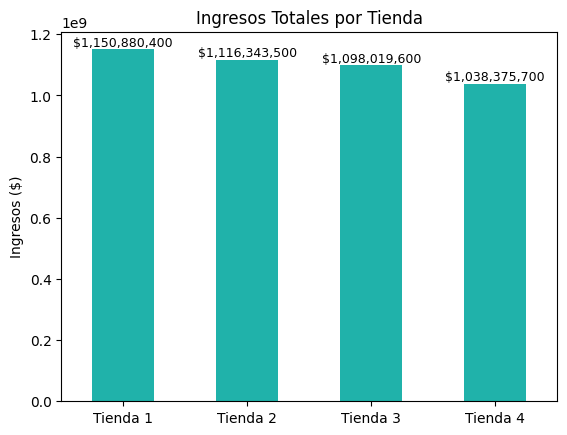

In [ ]:
###***Graficos***###

